## Question 1.1

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import calendar

In [3]:
XOM = pd.read_csv("XOM.csv")
XOM.head()

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA
0,2016-01-04,2016,1,4,<bound method PandasDelegate._add_delegate_acc...,1,2016-01,77.50,77.94,76.46,77.46,20400100.0,60.14,0.000000,60.1400,60.1400
1,2016-01-05,2016,1,5,<bound method PandasDelegate._add_delegate_acc...,1,2016-01,77.19,78.14,76.92,78.12,11993500.0,60.65,0.008521,60.3950,60.3950
2,2016-01-06,2016,1,6,<bound method PandasDelegate._add_delegate_acc...,1,2016-01,76.64,77.64,76.59,77.47,18826900.0,60.14,-0.008321,60.3100,60.3100
3,2016-01-07,2016,1,7,<bound method PandasDelegate._add_delegate_acc...,1,2016-01,76.06,77.99,75.90,76.23,21263800.0,59.18,-0.016006,60.0275,60.0275
4,2016-01-08,2016,1,8,<bound method PandasDelegate._add_delegate_acc...,1,2016-01,76.35,76.65,74.50,74.69,19033600.0,57.99,-0.020202,59.6200,59.6200


In [ ]:
# convert the column Date from string to datetime format
XOM.Date = XOM.Date.apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))

In [33]:
# create a day of week column "wday"
XOM['wday'] = XOM.Date.apply(lambda x: calendar.day_name[x.weekday()])

In [41]:
day_of_week_names = calendar.day_name[0:5]
r_dict = {}
for year in range(2016, 2021):
    r_dict[year] = {}
    XOM_year = XOM[XOM.Year == year]
    for day in day_of_week_names:
        XOM_year_day = XOM_year[XOM_year.wday == day]
        r_dict[year][day] = XOM_year_day.Return

In [98]:
result_dict = {}
for year in range(2016, 2021):
    R_mean = [] 
    R_sd = []    
    R_minus_mean = []    
    R_minus_sd = []   
    R_minus_len = []    
    R_plus_mean = []
    R_plus_sd = []    
    R_plus_len = []
    for day in day_of_week_names:
        
        # calculate the statistics for R
        r = r_dict[year][day]
        r_mean = np.mean(r)
        r_sd = np.sqrt(np.mean(r**2)-(r_mean**2))
        R_mean.append(r_mean)    
        R_sd.append(r_sd)
        
        # calculate the statistics for R_minus
        r_minus = r[r < 0]
        r_minus_len = len(r_minus)
        r_minus_mean = np.mean(r_minus)
        r_minus_sd = np.sqrt(np.mean(r_minus**2)-(r_minus_mean**2))
        R_minus_len.append(r_minus_len)
        R_minus_mean.append(r_minus_mean)
        R_minus_sd.append(r_minus_sd)
        
        # calculate the statistics for R_plus
        r_plus = r[r >= 0]
        r_plus_len = len(r_plus)
        r_plus_mean = np.mean(r_plus)
        r_plus_sd = np.sqrt(np.mean(r_plus**2)-(r_plus_mean**2))
        R_plus_len.append(r_plus_len)
        R_plus_mean.append(r_plus_mean)
        R_plus_sd.append(r_plus_sd)
        
    result_dict[year] = pd.DataFrame(list(zip(R_mean, R_sd, 
                                              R_minus_len, R_minus_mean, R_minus_sd,
                                              R_plus_len, R_plus_mean, R_plus_sd)), 
                                     index = day_of_week_names, 
                                     columns = ['mu(R)', 'sigma(R)', 
                                                '|Rminus|', 'mu(Rminus)', 'sigma(Rminus)',
                                                '|Rplus|', 'mu(Rplus)', 'sigma(Rplus)'])

## Question 1.2

In [99]:
result_dict[2016]

,mu(R),sigma(R),|Rminus|,mu(Rminus),sigma(Rminus),|Rplus|,mu(Rplus),sigma(Rplus)
Monday,0.000145,0.012738,20,-0.010484,0.010164,26,0.008321,0.007340
Tuesday,0.001311,0.011967,21,-0.009770,0.006765,31,0.008818,0.008348
Wednesday,0.001613,0.013851,25,-0.007872,0.008876,27,0.010395,0.011666
Thursday,0.002583,0.009911,21,-0.005469,0.004250,30,0.008219,0.008787
Friday,-0.001659,0.010793,27,-0.008793,0.008094,24,0.006367,0.007223


In [100]:
result_dict[2017]

,mu(R),sigma(R),|Rminus|,mu(Rminus),sigma(Rminus),|Rplus|,mu(Rplus),sigma(Rplus)
Monday,0.001156,0.006076,19,-0.004348,0.003941,27,0.005029,0.003954
Tuesday,-0.000218,0.005472,27,-0.004385,0.003086,24,0.004470,0.003376
Wednesday,-0.000496,0.008130,25,-0.007300,0.004632,27,0.005805,0.004986
Thursday,-0.000326,0.007864,23,-0.007263,0.005088,28,0.005372,0.004403
Friday,-0.000633,0.006983,27,-0.005336,0.005029,24,0.004658,0.004722


In [101]:
result_dict[2018]

,mu(R),sigma(R),|Rminus|,mu(Rminus),sigma(Rminus),|Rplus|,mu(Rplus),sigma(Rplus)
Monday,-0.001070,0.014521,22,-0.012982,0.012664,26,0.009009,0.005650
Tuesday,-0.001349,0.012329,30,-0.008960,0.008201,21,0.009523,0.008494
Wednesday,0.001443,0.015416,23,-0.011987,0.007557,27,0.012884,0.010341
Thursday,-0.000078,0.012327,26,-0.009466,0.008735,25,0.009686,0.006608
Friday,-0.001719,0.013752,24,-0.012538,0.012239,27,0.007897,0.005250


In [102]:
result_dict[2019]

,mu(R),sigma(R),|Rminus|,mu(Rminus),sigma(Rminus),|Rplus|,mu(Rplus),sigma(Rplus)
Monday,0.001507,0.010107,21,-0.007652,0.004781,27,0.008631,0.006916
Tuesday,-0.000874,0.010065,26,-0.008938,0.006159,26,0.007190,0.005885
Wednesday,-0.001842,0.011551,28,-0.010014,0.008809,23,0.008108,0.004594
Thursday,0.001306,0.011429,26,-0.007392,0.006358,24,0.010729,0.007590
Friday,0.001731,0.013643,21,-0.010848,0.007562,30,0.010537,0.009385


In [103]:
result_dict[2020]

,mu(R),sigma(R),|Rminus|,mu(Rminus),sigma(Rminus),|Rplus|,mu(Rplus),sigma(Rplus)
Monday,0.001030,0.040758,23,-0.029535,0.028259,25,0.029149,0.028365
Tuesday,0.003733,0.030152,29,-0.016758,0.010854,23,0.029568,0.026647
Wednesday,-0.003334,0.030940,30,-0.023587,0.021025,22,0.024284,0.018379
Thursday,-0.005055,0.032730,32,-0.022779,0.025721,20,0.023304,0.020493
Friday,-0.002389,0.029997,33,-0.017473,0.016615,16,0.028721,0.027371


## Question 1.3

In [112]:
days_with_negative = np.sum([np.sum(result_dict[year]['|Rminus|']) for year in range(2016,2021)])
days_with_negative

629

In [113]:
days_with_non_negative = np.sum([np.sum(result_dict[year]['|Rplus|']) for year in range(2016,2021)])
days_with_non_negative

630

The number of days with non-negative is one day more than the number of days with negative.

## Question 1.4

In [117]:
all_r = XOM.Return
all_r_plus = all_r[all_r >= 0]
all_r_minus = all_r[all_r < 0]

In [123]:
print("The average return amount in 'up' day is %.5f" % np.mean(all_r_plus))
print("The average return amount in 'down' day is %.5f" % np.mean(all_r_minus))

The average return amount in 'up' day is 0.01130
The average return amount in 'down' day is -0.01162


The absolute value of the average return amount in 'down' day, 0.01162, is slightly higher than the average return amount in 'up' day, 0.01130. Therefore, the stock XOM lose more on a 'down' day than it gains on an 'up' day.

## Question 1.5

In order to check whether the pattern stay the same for each year, we compare the magnitude of the columns 'mu(Rminus)' and 'mu(Rplus)' for each day of the week. 

In [124]:
result_dict[2016]

,mu(R),sigma(R),|Rminus|,mu(Rminus),sigma(Rminus),|Rplus|,mu(Rplus),sigma(Rplus)
Monday,0.000145,0.012738,20,-0.010484,0.010164,26,0.008321,0.007340
Tuesday,0.001311,0.011967,21,-0.009770,0.006765,31,0.008818,0.008348
Wednesday,0.001613,0.013851,25,-0.007872,0.008876,27,0.010395,0.011666
Thursday,0.002583,0.009911,21,-0.005469,0.004250,30,0.008219,0.008787
Friday,-0.001659,0.010793,27,-0.008793,0.008094,24,0.006367,0.007223


For 2016, the result from previous part is the same for Monday, Tuesday, Friday. 

In [125]:
result_dict[2017]

,mu(R),sigma(R),|Rminus|,mu(Rminus),sigma(Rminus),|Rplus|,mu(Rplus),sigma(Rplus)
Monday,0.001156,0.006076,19,-0.004348,0.003941,27,0.005029,0.003954
Tuesday,-0.000218,0.005472,27,-0.004385,0.003086,24,0.004470,0.003376
Wednesday,-0.000496,0.008130,25,-0.007300,0.004632,27,0.005805,0.004986
Thursday,-0.000326,0.007864,23,-0.007263,0.005088,28,0.005372,0.004403
Friday,-0.000633,0.006983,27,-0.005336,0.005029,24,0.004658,0.004722


For 2017, the result from previous part is the same for Wednesday, Thursday, Friday. 

In [126]:
result_dict[2018]

,mu(R),sigma(R),|Rminus|,mu(Rminus),sigma(Rminus),|Rplus|,mu(Rplus),sigma(Rplus)
Monday,-0.001070,0.014521,22,-0.012982,0.012664,26,0.009009,0.005650
Tuesday,-0.001349,0.012329,30,-0.008960,0.008201,21,0.009523,0.008494
Wednesday,0.001443,0.015416,23,-0.011987,0.007557,27,0.012884,0.010341
Thursday,-0.000078,0.012327,26,-0.009466,0.008735,25,0.009686,0.006608
Friday,-0.001719,0.013752,24,-0.012538,0.012239,27,0.007897,0.005250


For 2018, the result from previous part is the same for Monday and Friday.

In [127]:
result_dict[2019]

,mu(R),sigma(R),|Rminus|,mu(Rminus),sigma(Rminus),|Rplus|,mu(Rplus),sigma(Rplus)
Monday,0.001507,0.010107,21,-0.007652,0.004781,27,0.008631,0.006916
Tuesday,-0.000874,0.010065,26,-0.008938,0.006159,26,0.007190,0.005885
Wednesday,-0.001842,0.011551,28,-0.010014,0.008809,23,0.008108,0.004594
Thursday,0.001306,0.011429,26,-0.007392,0.006358,24,0.010729,0.007590
Friday,0.001731,0.013643,21,-0.010848,0.007562,30,0.010537,0.009385


For 2019, the result from previous part is the same for Tuesday, Wednesday and Friday. 

In [128]:
result_dict[2020]

,mu(R),sigma(R),|Rminus|,mu(Rminus),sigma(Rminus),|Rplus|,mu(Rplus),sigma(Rplus)
Monday,0.001030,0.040758,23,-0.029535,0.028259,25,0.029149,0.028365
Tuesday,0.003733,0.030152,29,-0.016758,0.010854,23,0.029568,0.026647
Wednesday,-0.003334,0.030940,30,-0.023587,0.021025,22,0.024284,0.018379
Thursday,-0.005055,0.032730,32,-0.022779,0.025721,20,0.023304,0.020493
Friday,-0.002389,0.029997,33,-0.017473,0.016615,16,0.028721,0.027371


For 2020, the result from previous part is the same for Monday.

## Question 2.1

In [183]:
all_R_mean = pd.concat([result_dict[x]['mu(R)'] for x in range(2016, 2021)], axis = 1)
all_R_mean.columns = list(range(2016, 2021))
all_R_mean

,2016,2017,2018,2019,2020
Monday,0.000145,0.001156,-0.001070,0.001507,0.001030
Tuesday,0.001311,-0.000218,-0.001349,-0.000874,0.003733
Wednesday,0.001613,-0.000496,0.001443,-0.001842,-0.003334
Thursday,0.002583,-0.000326,-0.000078,0.001306,-0.005055
Friday,-0.001659,-0.000633,-0.001719,0.001731,-0.002389


Text(0.5, 1.0, 'Average Return against Day of Week by Year')

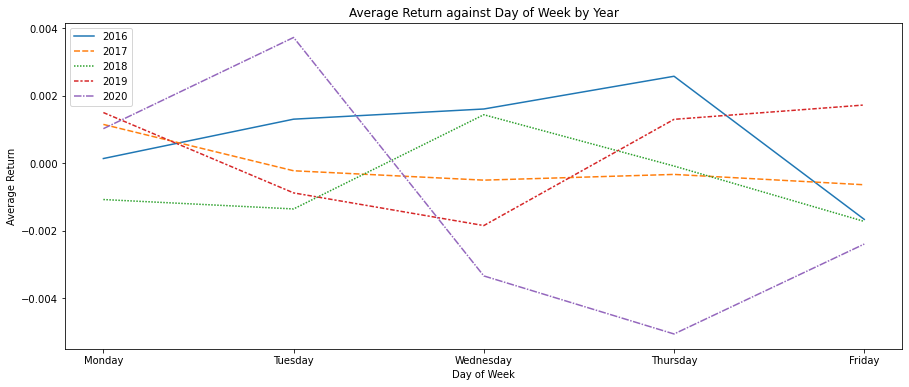

In [148]:
plt.figure(figsize = (15,6))
sns.lineplot(data = all_R_mean)
plt.xlabel("Day of Week")
plt.ylabel("Average Return")
plt.title("Average Return against Day of Week by Year")

There is no consistent pattern across the days of the week among the five years. \
For 2016, the average return reaches the peak on Thursday and the trough on Friday. \
For 2017, the average return reaches the peak on Monday and the trough on Wednesday. \
For 2018, the average return reaches the peak on Wednesday and the trough on Friday. \
For 2019, the average return reaches the peak on Friday and the trough on Wednesday. \
For 2020, the average return reaches the peak on Tuesday and the trough on Thursday. 

In [149]:
all_R_minus_mean = pd.concat([result_dict[x]['mu(Rminus)'] for x in range(2016, 2021)], axis = 1)
all_R_minus_mean.columns = list(range(2016, 2021))

Text(0.5, 1.0, "Average Return in 'down' day against Day of Week by Year")

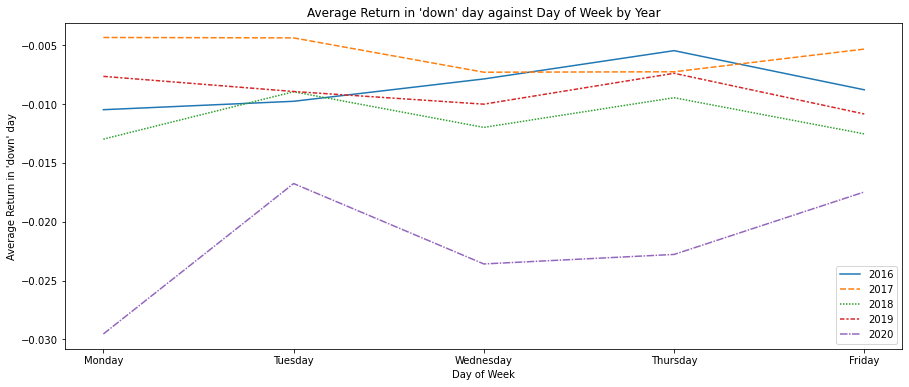

In [150]:
plt.figure(figsize = (15,6))
sns.lineplot(data = all_R_minus_mean)
plt.xlabel("Day of Week")
plt.ylabel("Average Return in 'down' day")
plt.title("Average Return in 'down' day against Day of Week by Year")

The average return in 'down' is much lower in each day of the week in 2020 compared to other years. 

In [152]:
all_R_plus_mean = pd.concat([result_dict[x]['mu(Rplus)'] for x in range(2016, 2021)], axis = 1)
all_R_plus_mean.columns = list(range(2016, 2021))

Text(0.5, 1.0, "Average Return in 'up' day against Day of Week by Year")

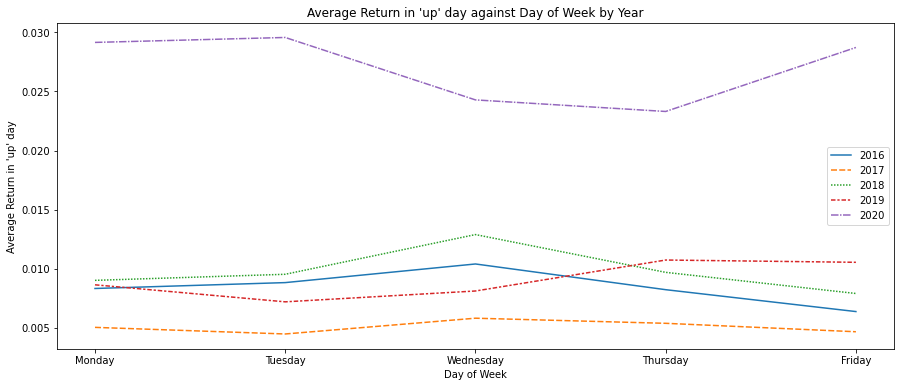

In [153]:
plt.figure(figsize = (15,6))
sns.lineplot(data = all_R_plus_mean)
plt.xlabel("Day of Week")
plt.ylabel("Average Return in 'up' day")
plt.title("Average Return in 'up' day against Day of Week by Year")

The average return in 'up' is much higher in each day of the week in 2020 compared to other years. 

## Question 2.2

In [176]:
r_mon = pd.DataFrame([result_dict[x]['mu(R)'][0] for x in range(2016,2021)], index = list(range(2016, 2021)))
r_tue = pd.DataFrame([result_dict[x]['mu(R)'][1] for x in range(2016,2021)], index = list(range(2016, 2021)))
r_wed = pd.DataFrame([result_dict[x]['mu(R)'][2] for x in range(2016,2021)], index = list(range(2016, 2021)))
r_thu = pd.DataFrame([result_dict[x]['mu(R)'][3] for x in range(2016,2021)], index = list(range(2016, 2021)))
r_fri = pd.DataFrame([result_dict[x]['mu(R)'][4] for x in range(2016,2021)], index = list(range(2016, 2021)))

In [182]:
r_per_day_of_week = pd.concat([r_mon, r_tue, r_wed, r_thu, r_fri], axis = 1)
r_per_day_of_week.columns = day_of_week_names
r_per_day_of_week

,Monday,Tuesday,Wednesday,Thursday,Friday
2016,0.000145,0.001311,0.001613,0.002583,-0.001659
2017,0.001156,-0.000218,-0.000496,-0.000326,-0.000633
2018,-0.001070,-0.001349,0.001443,-0.000078,-0.001719
2019,0.001507,-0.000874,-0.001842,0.001306,0.001731
2020,0.001030,0.003733,-0.003334,-0.005055,-0.002389


Text(0.5, 1.0, 'Average Return against Year by the Day of Week')

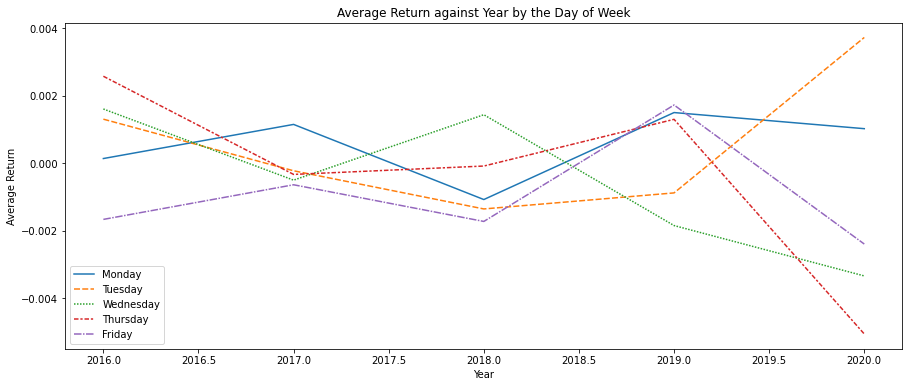

In [184]:
plt.figure(figsize = (15,6))
sns.lineplot(data = r_per_day_of_week)
plt.xlabel("Year")
plt.ylabel("Average Return")
plt.title("Average Return against Year by the Day of Week")

From 2016 to 2017, the average return decreases on Tuesday, Wednesday and Thursday. The average return increases on Monday and Friday. \
From 2017 to 2018, the average return decreases on Monday, Tuesday and Friday. The average return increases on Wednesday and Thursday. \
From 2018 to 2019, the average return decreases on Wednesday. The average return increases on Monday, Tuesday, Thursday and Friday.\
From 2019 to 2020, the average return decreases on Monday, Wednesday, Thursday and Friday. The average return increases on Tuesday.

## Question 2.3

For 2016, the best day of the week to be invested is Thursday, and the worst day of the week to be invested is Friday. \
For 2017, the best day of the week to be invested is Monday, and the worst day of the week to be invested is Friday. \
For 2018, the best day of the week to be invested is Wednesday, and the worst day of the week to be invested is Friday. \
For 2019, the best day of the week to be invested is Friday, and the worst day of the week to be invested is Wednesday. \
For 2020, the best day of the week to be invested is Tuesday, and the worst day of the week to be invested is Thursday. 

## Question 2.4

Yes. 

## Question 3.1

##### _Create the aggregate table for the stock XOM_

In [185]:
day_of_week_names = calendar.day_name[0:5]
xom_dict = {}
for day in day_of_week_names:
    XOM_day = XOM[XOM.wday == day]
    xom_dict[day] = XOM_day.Return

In [189]:
R_mean = [] 
R_sd = []    
R_minus_mean = []    
R_minus_sd = []   
R_minus_len = []    
R_plus_mean = []
R_plus_sd = []    
R_plus_len = []

for day in day_of_week_names:

    # calculate the statistics for R
    r = xom_dict[day]
    r_mean = np.mean(r)
    r_sd = np.sqrt(np.mean(r**2)-(r_mean**2))
    R_mean.append(r_mean)    
    R_sd.append(r_sd)

    # calculate the statistics for R_minus
    r_minus = r[r < 0]
    r_minus_len = len(r_minus)
    r_minus_mean = np.mean(r_minus)
    r_minus_sd = np.sqrt(np.mean(r_minus**2)-(r_minus_mean**2))
    R_minus_len.append(r_minus_len)
    R_minus_mean.append(r_minus_mean)
    R_minus_sd.append(r_minus_sd)

    # calculate the statistics for R_plus
    r_plus = r[r >= 0]
    r_plus_len = len(r_plus)
    r_plus_mean = np.mean(r_plus)
    r_plus_sd = np.sqrt(np.mean(r_plus**2)-(r_plus_mean**2))
    R_plus_len.append(r_plus_len)
    R_plus_mean.append(r_plus_mean)
    R_plus_sd.append(r_plus_sd)

xom_result_dict = pd.DataFrame(list(zip(R_mean, R_sd, 
                                        R_minus_len, R_minus_mean, R_minus_sd,
                                        R_plus_len, R_plus_mean, R_plus_sd)), 
                               index = day_of_week_names, 
                               columns = ['mu(R)', 'sigma(R)', 
                                          '|Rminus|', 'mu(Rminus)', 'sigma(Rminus)',
                                          '|Rplus|', 'mu(Rplus)', 'sigma(Rplus)'])

##### _Create the aggregate table for the stock SPY_

In [193]:
SPY = pd.read_csv("SPY.csv")
SPY.head()

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA
0,2016-01-04,2016,1,4,Monday,1,2016-01,200.49,201.03,198.59,201.02,222353500.0,182.51,0.000000,182.510,182.510
1,2016-01-05,2016,1,5,Tuesday,1,2016-01,201.40,201.90,200.05,201.36,110845800.0,182.82,0.001691,182.665,182.665
2,2016-01-06,2016,1,6,Wednesday,1,2016-01,198.34,200.06,197.60,198.82,152112600.0,180.52,-0.012614,181.950,181.950
3,2016-01-07,2016,1,7,Thursday,1,2016-01,195.33,197.44,193.59,194.05,213436100.0,176.19,-0.023991,180.510,180.510
4,2016-01-08,2016,1,8,Friday,1,2016-01,195.19,195.85,191.58,191.92,209817200.0,174.25,-0.010977,179.258,179.258


In [194]:
# convert the column Date from string to datetime format
SPY.Date = SPY.Date.apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))

In [195]:
# create a day of week column "wday"
SPY['wday'] = SPY.Date.apply(lambda x: calendar.day_name[x.weekday()])

In [196]:
spy_dict = {}
for day in day_of_week_names:
    SPY_day = SPY[SPY.wday == day]
    spy_dict[day] = SPY_day.Return

In [197]:
R_mean = [] 
R_sd = []    
R_minus_mean = []    
R_minus_sd = []   
R_minus_len = []    
R_plus_mean = []
R_plus_sd = []    
R_plus_len = []

for day in day_of_week_names:

    # calculate the statistics for R
    r = spy_dict[day]
    r_mean = np.mean(r)
    r_sd = np.sqrt(np.mean(r**2)-(r_mean**2))
    R_mean.append(r_mean)    
    R_sd.append(r_sd)

    # calculate the statistics for R_minus
    r_minus = r[r < 0]
    r_minus_len = len(r_minus)
    r_minus_mean = np.mean(r_minus)
    r_minus_sd = np.sqrt(np.mean(r_minus**2)-(r_minus_mean**2))
    R_minus_len.append(r_minus_len)
    R_minus_mean.append(r_minus_mean)
    R_minus_sd.append(r_minus_sd)

    # calculate the statistics for R_plus
    r_plus = r[r >= 0]
    r_plus_len = len(r_plus)
    r_plus_mean = np.mean(r_plus)
    r_plus_sd = np.sqrt(np.mean(r_plus**2)-(r_plus_mean**2))
    R_plus_len.append(r_plus_len)
    R_plus_mean.append(r_plus_mean)
    R_plus_sd.append(r_plus_sd)

spy_result_dict = pd.DataFrame(list(zip(R_mean, R_sd, 
                                        R_minus_len, R_minus_mean, R_minus_sd,
                                        R_plus_len, R_plus_mean, R_plus_sd)), 
                               index = day_of_week_names, 
                               columns = ['mu(R)', 'sigma(R)', 
                                          '|Rminus|', 'mu(Rminus)', 'sigma(Rminus)',
                                          '|Rplus|', 'mu(Rplus)', 'sigma(Rplus)'])

The table for XOM is 

In [199]:
xom_result_dict

,mu(R),sigma(R),|Rminus|,mu(Rminus),sigma(Rminus),|Rplus|,mu(Rplus),sigma(Rplus)
Monday,0.000552,0.021005,105,-0.013504,0.017768,131,0.011818,0.016018
Tuesday,0.000531,0.016489,133,-0.009855,0.008616,125,0.011581,0.015662
Wednesday,-0.000533,0.017950,131,-0.012542,0.013628,126,0.011952,0.012581
Thursday,-0.000339,0.017699,128,-0.011321,0.015555,127,0.010730,0.011877
Friday,-0.000922,0.016891,132,-0.011264,0.011930,121,0.010359,0.014049


The table for SPY is 

In [200]:
spy_result_dict

,mu(R),sigma(R),|Rminus|,mu(Rminus),sigma(Rminus),|Rplus|,mu(Rplus),sigma(Rplus)
Monday,0.000509,0.013913,99,-0.008613,0.014802,137,0.007100,0.008460
Tuesday,0.001215,0.011465,112,-0.006709,0.006935,146,0.007294,0.010500
Wednesday,0.000906,0.011115,106,-0.007369,0.010126,151,0.006715,0.007515
Thursday,-0.000001,0.011658,117,-0.007136,0.012440,138,0.006048,0.006339
Friday,0.000556,0.011111,111,-0.007257,0.008449,142,0.006663,0.008895


For XOM, the best day of the week is Monday. The worst day of the week is Friday. \
For SPY, the best day of the week is Tuesday. The worst day of the week is Thursday. 

## Question 3.2

No. We have different best day and worst day for XOM and SPY. 

## Question 4.1

In [209]:
xom_r = XOM.Return
xom_r_plus = xom_r[xom_r >= 0]

xom_A = 100
for rr in xom_r_plus:
    xom_A += xom_A*rr

In [210]:
print('For my stock XOM, I will have $%0.2f in my last trading day of year 5' % xom_A)

For my stock XOM, I will have $111684.53 in my last trading day of year 5


## Question 4.2

In [211]:
spy_r = SPY.Return
spy_r_plus = spy_r[spy_r >= 0]

spy_A = 100
for rr in spy_r_plus:
    spy_A += spy_A*rr

In [212]:
print('For the stock SPY, I will have $%0.2f in my last trading day of year 5' % spy_A)

For the stock SPY, I will have $12045.96 in my last trading day of year 5


## Question 5.1

In [214]:
xom_A = 100
for rr in xom_r:
    xom_A += xom_A*rr

In [215]:
print('For my stock XOM with buy-and-hold strategy, I will have $%0.2f in my last trading day of year 5' % xom_A)

For my stock XOM with buy-and-hold strategy, I will have $67.40 in my last trading day of year 5


In [217]:
spy_A = 100
for rr in spy_r:
    spy_A += spy_A*rr

In [218]:
print('For the stock SPY with buy-and-hold strategy, I will have $%0.2f in my last trading day of year 5' % spy_A)

For the stock SPY with buy-and-hold strategy, I will have $204.85 in my last trading day of year 5


## Question 5.2

Comparing to the results in question 4, we have opposite result. In question 4, we earn more by buying the stock XOM than SPY. \
In this question, we earn more by buying the stock SPY than XOM. 

## Question 6.1

In [237]:
xom_best_10 = np.sort(xom_r)[-10:]
xom_worst_10 = np.sort(xom_r)[:10]
xom_best_5 = np.sort(xom_r)[-5:]
xom_worst_5 = np.sort(xom_r)[:5]
xom_best_5_worst_5 = np.concatenate((xom_worst_5, xom_best_5)) 

In [240]:
spy_best_10 = np.sort(spy_r)[-10:]
spy_worst_10 = np.sort(spy_r)[:10]
spy_best_5 = np.sort(spy_r)[-5:]
spy_worst_5 = np.sort(spy_r)[:5]
spy_best_5_worst_5 = np.concatenate((spy_worst_5, spy_best_5)) 

#### Scenario (a)

In [238]:
xom_A = 100
for rr in xom_r:
    if rr >= 0 and rr not in xom_best_10:
        xom_A += xom_A*rr

In [239]:
print('For my stock XOM, I will have $%0.2f in my last trading day of year 5' % xom_A)

For my stock XOM, I will have $49186.18 in my last trading day of year 5


In [241]:
spy_A = 100
for rr in spy_r:
    if rr >= 0 and rr not in spy_best_10:
        spy_A += spy_A*rr

In [242]:
print('For the stock SPY, I will have $%0.2f in my last trading day of year 5' % spy_A)

For the stock SPY, I will have $6884.72 in my last trading day of year 5


#### Scenario (b)

In [243]:
xom_A = 100
for rr in xom_r:
    if rr >= 0 or rr in xom_worst_10:
        xom_A += xom_A*rr

In [244]:
print('For my stock XOM, I will have $%0.2f in my last trading day of year 5' % xom_A)

For my stock XOM, I will have $47609.43 in my last trading day of year 5


In [249]:
spy_A = 100
for rr in spy_r:
    if rr >= 0 or rr in spy_worst_10:
        spy_A += spy_A*rr

In [250]:
print('For the stock SPY, I will have $%0.2f in my last trading day of year 5' % spy_A)

For the stock SPY, I will have $6365.38 in my last trading day of year 5


#### Scenario (c)

In [251]:
xom_A = 100
for rr in xom_r:
    if (rr >= 0 and rr not in xom_best_5) or rr in xom_worst_5:
        xom_A += xom_A*rr

In [252]:
print('For my stock XOM, I will have $%0.2f in my last trading day of year 5' % xom_A)

For my stock XOM, I will have $39399.72 in my last trading day of year 5


In [253]:
spy_A = 100
for rr in spy_r:
    if (rr >= 0 and rr not in spy_best_5) or rr in spy_worst_5:
        spy_A += spy_A*rr

In [254]:
print('For the stock SPY, I will have $%0.2f in my last trading day of year 5' % spy_A)

For the stock SPY, I will have $5677.58 in my last trading day of year 5


## Question 6.2

We gain more in scenario (a). So, we gain more by missing the worst days, scenario (b).

## Question 6.3

The result is much different than Question 4. 

For my stock XOM, I gain \\$111684.53 in question 4 and gain just \\$39399.72 in question 6(c). 

For the stock SPY, I gain \\$12045.96 in question 4 and gain just \\$5677.58 in question 6(c). 